In [2]:
import pandas as pd

data_path = "./Data/"

adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)

adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

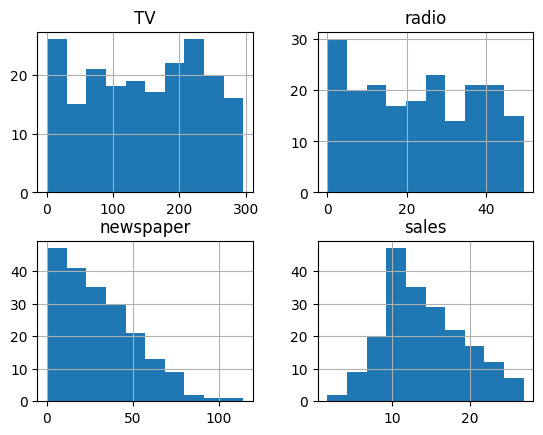

In [3]:
adv.hist()

för att en regression ska fungera så behöver vår Y variabel "sales" vara normalt fördelad

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

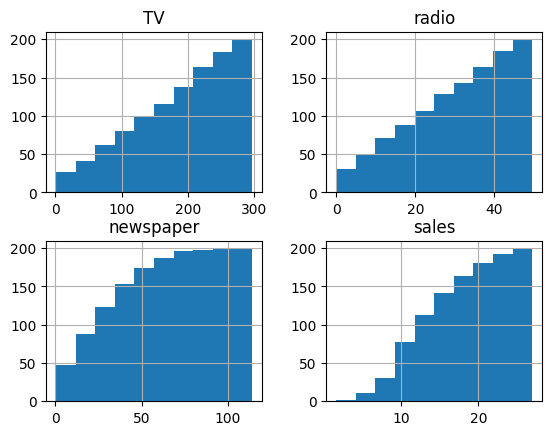

In [4]:
adv.hist(cumulative=True)

array([[<Axes: title={'center': ' Gamma / Chi ^2'}>,
        <Axes: title={'center': ' Standard Normal '}>],
       [<Axes: title={'center': ' Binomial '}>, <Axes: >]], dtype=object)

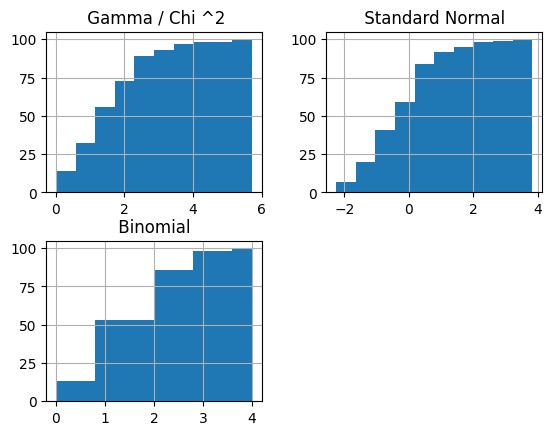

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.column_stack([np.random.gamma(2,1,size =100) ,
                                    np.random.standard_normal(size =100) ,
                                    np.random.binomial(5,.3,size =100) ]) ,
                                    columns =["Gamma / Chi ^2","Standard Normal","Binomial"])
df.hist(cumulative=True)

<Axes: >

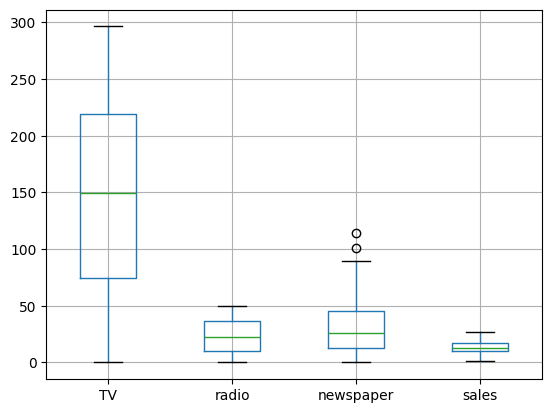

In [19]:
adv.boxplot()

<Axes: >

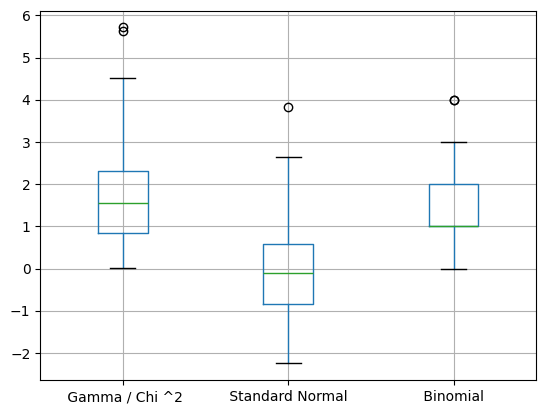

In [20]:
df.boxplot()

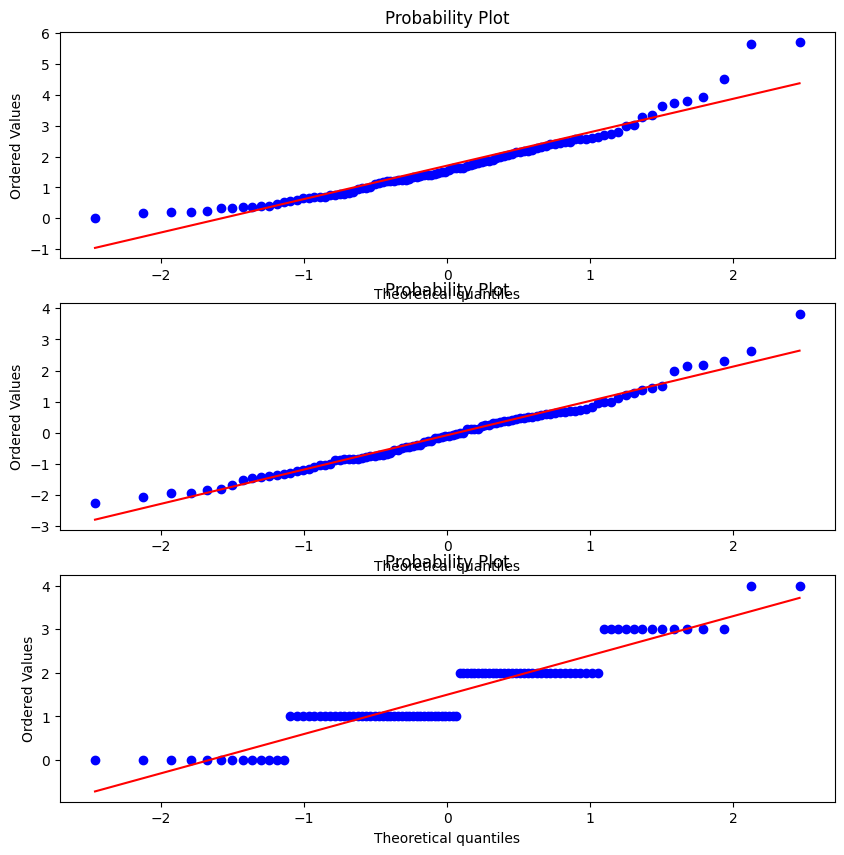

In [29]:
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1, figsize=[10,10])
stats.probplot(df[" Gamma / Chi ^2"].to_numpy(),plot=ax[0])
stats.probplot(df[" Standard Normal "].to_numpy(),plot=ax[1])
stats.probplot(df[" Binomial "].to_numpy(),plot=ax[2])
plt.show()

In [30]:
adv.corr() #pearson

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


s^2 = uppskattning för stickprovsvariansen

$$S^2=\frac{1}{n-1}\sum\limits^{n}_{i=1}(x_i-\bar{x})^2$$

$$\bar{x}=\sum\limits^{n}_{i=1}x_i/n$$


            för att detta ska funka: (linjär regression)
$$Y = \beta_{0}+\beta_{1}X_{1}+...+\beta_{d}X_{d}$$

            måste detta vara sant (måste vara linjär)
$$ E[X_{1}+X_{2}] = E[X_{1}]+E[X_{2}] $$




$$
E[X+Y] = \sum\limits_{X}\sum\limits_{X}(X+Y)Fxy(x,y)
$$

$$
= \sum\limits_{X}\sum\limits_{X}Xfxy(x,y) +  \sum\limits_{X}\sum\limits_{X}Yfxy(x,y)
$$
$$
= E[X]+E[Y]
$$

ska man visa att väntevärdet är linjärt räcker det med definitionerna

$S^2$ is an unbiased esimator for $\sigma^2$ but $\sqrt{S^2}$ is not an unbiased estimator of $\sigma$

solution: Standard error of the mean(standardavvikelsen i medlet)



$Var \hat{X} = \frac{\sigma^2}{n}$

$\sqrt{var \hat{X}}= \frac{\sigma}{\sqrt{n}}$


in machine learning we instead use RSE on val/test data

$\implies$ thighter interval on smaller n!

RSE = $\sqrt{\frac{1}{n-2}SSE}$

use $\beta$ from train, but calc SSE on test!

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
1.0
reg.coef_
array([1., 2.])
reg.intercept_
np.float64(3.0...)
reg.predict(np.array([[3, 5]]))
array([16.])